In [46]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from ta.momentum import RSIIndicator
import plotly.graph_objects as go

In [47]:

# Define the stock symbol, start and end dates
ticker = "ITC.NS"  # Enter Stock Ticker Here
start_date = "2022-10-10"  # Duration
end_date = "2023-10-18"

# Download stock data from Yahoo Finance
stock = yf.download(ticker, start=start_date, end=end_date)

# Save the data to a CSV file
stock.to_csv(f"{ticker}_data.csv")

# Read the data from the CSV file
stock = pd.read_csv(f"{ticker}_data.csv")
stock.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,330.000000,331.450012,326.049988,327.850006,320.783447,9388996
1,2022-10-11,329.000000,330.450012,325.100006,326.299988,319.266846,10609956
2,2022-10-12,327.950012,331.450012,324.750000,330.100006,322.984955,10337544
3,2022-10-13,329.950012,331.299988,328.000000,328.649994,321.566193,7266724
4,2022-10-14,332.299988,333.899994,330.850006,332.100006,324.941833,6424915


In [48]:

# Calculate the RSI (Relative Strength Index)
rsi_period = 14
rsi = RSIIndicator(stock['Close'], rsi_period)
rsi_values = rsi.rsi()  # Get RSI values

# Calculate overbought and oversold levels
overbought = 70
oversold = 30

In [49]:

# Create a DataFrame to hold RSI, overbought, and oversold levels
rsi_df = pd.DataFrame({
    'RSI': rsi_values,
    'Overbought': overbought,
    'Oversold': oversold
}, index=stock['Date'])

In [50]:

# Split the data into train and test sets
X = np.array(stock.index).reshape(-1, 1)
Y = stock['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Feature Scaling
scaler = StandardScaler().fit(X_train)


In [51]:

# Create a Linear Regression model
lm = LinearRegression()
lm.fit(X_train, Y_train)

# Make predictions for the entire dataset
predictions = lm.predict(X)

# Calculate percentage of profit or loss for each day
initial_price = stock['Close'].iloc[0]
predicted_initial = predictions[0]

profits_or_losses = [(predicted - predicted_initial) / predicted_initial * 100 for predicted in predictions]

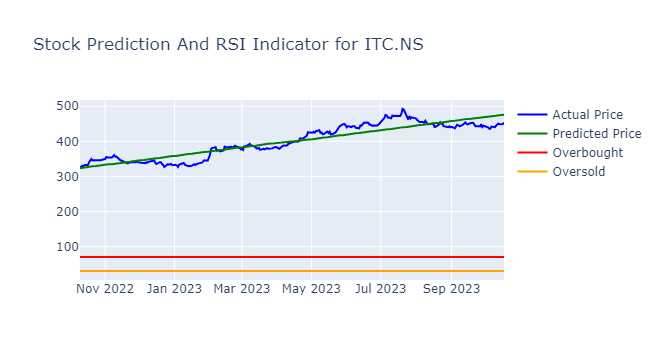


Metric           Train                Test        
r2_score  0.8453	0.8410
MSE       361.7030	398.6130



In [52]:

# Create a single graph for Actual Price, Predicted Price, Oversold, and Overbought
fig = go.Figure()

# Add Actual Price trace
fig.add_trace(go.Scatter(x=stock['Date'], y=stock['Close'], name='Actual Price', line=dict(color='blue')))

# Add Predicted Price trace
fig.add_trace(go.Scatter(x=stock['Date'], y=predictions, name='Predicted Price', line=dict(color='green')))

# Add Oversold and Overbought traces
fig.add_trace(go.Scatter(x=rsi_df.index, y=rsi_df['Overbought'], name='Overbought', line=dict(color='red')))
fig.add_trace(go.Scatter(x=rsi_df.index, y=rsi_df['Oversold'], name='Oversold', line=dict(color='orange')))
fig.update_layout(title_text=f'Stock Prediction And RSI Indicator for {ticker}')

# Show the combined graph
fig.show()

# Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train)):.4f}\t{r2_score(Y_test, lm.predict(X_test)):.4f}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train)):.4f}\t{mse(Y_test, lm.predict(X_test)):.4f}
'''

print(scores)